# ПРОЕКТ: Развлекательное приложение Procrastinate Pro+

### Основная информация о проекте

#### Цель:     
разобраться в причинах убытков компании и помочь выйти в плюс.
#### Задачи:
изучить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

#### Источник: 
датасет о пользователях, привлеченных с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

### Загрузка данных и подготовка их к анализу

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

Импортируем библиотеки, которые понадобятся в дальнейшей работе, загружаем данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные, а также выводим первые 5 строк датафреймов и их основную информацию.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).



In [42]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
from matplotlib import pyplot as plt
import os
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format 
import plotly.express as px

In [43]:
pth1 = 'visits_info_short.csv'
pth2 = '/datasets/visits_info_short.csv'

pth3 = 'orders_info_short.csv'
pth4 = '/datasets/orders_info_short.csv'

pth5 = 'costs_info_short.csv'
pth6 = '/datasets/costs_info_short.csv'

def reading(pth, pth1):
    if os.path.exists(pth):
        return pd.read_csv(pth)
    elif os.path.exists(pth1):
        return pd.read_csv(pth1)
    else:
        print('Something is wrong')

visits = reading(pth1, pth2)
orders = reading(pth3, pth4)
costs = reading(pth5, pth6)

display(visits.head())
display(visits.info())

display(orders.head())
display(orders.info())

display(costs.head())
display(costs.info())

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.30
1,2019-05-02,FaceBoom,78.10
2,2019-05-03,FaceBoom,85.80
3,2019-05-04,FaceBoom,136.40
4,2019-05-05,FaceBoom,122.10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

По результатам вывода первых 5 строк датафреймов и их основной информации, определяем:
- Текстовые значения, а также наименования столбцов имеют разный регистр
- Все столбцы с датой имеют тип `object`
- Отсутствуют пропуски во всех датафреймах


Для начала приведем все значения и наименования столбцов к нижнему регистру

In [44]:
'''
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']
orders.columns = ['user_id', 'event_dt', 'revenue']
costs = costs.rename( columns = {'Channel': 'channel'})
'''

visits.columns = [x.lower().replace(' ', '_') for x in visits.columns.values]
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns.values]
costs.columns = [x.lower().replace(' ', '_') for x in costs.columns.values]

visits['region'] = visits['region'].str.lower()
visits['device'] = visits['device'].str.lower()
visits['channel'] = visits['channel'].str.lower()
costs['channel'] = costs['channel'].str.lower()


Далее, изменим типы данных столбцов с датой  на тип `datetime`
- `visit['session_start']`;
- `visit['session_end']`;
- `orders['event_dt']`;
- `costs['dt']`.

In [45]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

Проверим изменения


In [46]:
display(visits.head(3))
display(visits.info())

display(orders.head(3))
display(orders.info())

display(costs.head(3))
display(costs.info())

,user_id,region,device,channel,session_start,session_end
0,981449118918,united states,iphone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,united states,iphone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,united states,mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


None

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


None

,dt,channel,costs
0,2019-05-01,faceboom,113.30
1,2019-05-02,faceboom,78.10
2,2019-05-03,faceboom,85.80


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

Далее проверим датафреймы на наличие явных дубликатов

In [47]:
print(visits.duplicated().sum())
print(orders.duplicated().sum())
print(costs.duplicated().sum())

0
0
0


Рассмотрим :
- уникальные значения столбцов `region`, `device`,	`channel`, `revenue`
- минимальные и максимальные даты
- минимальные и максимальные значения столбцов `costs`, 

In [48]:
print('уникальные значения столбца region \n')
print(visits['region'].unique())

print('\n уникальные значения столбца device \n')
print(visits['device'].unique())

print('\n уникальные значения столбца channel \n')
print(visits['channel'].unique())

print('\n уникальные значения столбца revenue \n')
print(orders['revenue'].unique())

print('\n Минимальные даты \n')
print(visits['session_start'].min())
print(visits['session_end'].min())
print(orders['event_dt'].min())
print(costs['dt'].min())

print('\n Максимальные даты \n')
print(visits['session_start'].max())
print(visits['session_end'].max())
print(orders['event_dt'].max())
print(costs['dt'].max())

print('\n Минимальное и максимальное значение costs \n')
print(costs['costs'].max())
print(costs['costs'].min())

уникальные значения столбца region 

['united states' 'uk' 'france' 'germany']

 уникальные значения столбца device 

['iphone' 'mac' 'android' 'pc']

 уникальные значения столбца channel 

['organic' 'tiptop' 'rocketsuperads' 'yrabbit' 'faceboom' 'mediatornado'
 'adnonsense' 'leapbob' 'wahoonetbanner' 'opplecreativemedia'
 'lambdamediaads']

 уникальные значения столбца revenue 

[ 4.99  5.99  9.99 49.99 19.99]

 Минимальные даты 

2019-05-01 00:00:41
2019-05-01 00:07:06
2019-05-01 00:28:11
2019-05-01

 Максимальные даты 

2019-10-31 23:59:23
2019-11-01 01:38:46
2019-10-31 23:56:56
2019-10-27

 Минимальное и максимальное значение costs 

630.0
0.8


Исходные данные очень хорошего качества:
- Отсутствуют дубликаты
- Отсутствуют пропуски данных во всех датафреймах
- Отсутствуют опечатки слов в данных
- Отсутствуют "лишние" знаки и символы

Все чисто, красиво

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Функция для создания профилей пользователей:

In [49]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [50]:
# получаем профили пользователей
profiles = get_profiles(visits, orders, costs)
display(profiles.head()) 

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,faceboom,mac,united states,2019-05-07,2019-05-01,True,1.09
1,4919697,2019-07-09 12:46:07,faceboom,iphone,united states,2019-07-09,2019-07-01,False,1.11
2,6085896,2019-10-01 09:58:33,organic,iphone,france,2019-10-01,2019-10-01,False,0.00
3,22593348,2019-08-22 21:35:48,adnonsense,pc,germany,2019-08-22,2019-08-01,False,0.99
4,31989216,2019-10-02 00:07:44,yrabbit,iphone,united states,2019-10-02,2019-10-01,False,0.23


#### Функция для подсчёта удержания:

In [51]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

#### Функция для подсчёта конверсии:

In [52]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

#### Функция для подсчёта LTV:

In [53]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

#### Функция для сглаживания данных:

In [54]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

#### Функция для для построения графика Retention Rate,:

In [55]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

#### Функция для для построения графика конверсии:

In [56]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

#### Функция для визуализации LTV и ROI:

In [57]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Составление профилей пользователей и определение минимальной и максимальной даты привлечения пользователей

In [58]:
# получаем профили пользователей
profiles = get_profiles(visits, orders, costs)
display(profiles.head()) 

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,faceboom,mac,united states,2019-05-07,2019-05-01,True,1.09
1,4919697,2019-07-09 12:46:07,faceboom,iphone,united states,2019-07-09,2019-07-01,False,1.11
2,6085896,2019-10-01 09:58:33,organic,iphone,france,2019-10-01,2019-10-01,False,0.00
3,22593348,2019-08-22 21:35:48,adnonsense,pc,germany,2019-08-22,2019-08-01,False,0.99
4,31989216,2019-10-02 00:07:44,yrabbit,iphone,united states,2019-10-02,2019-10-01,False,0.23


In [59]:
print('Максимальная дата: {}'.format(profiles['dt'].max())) 
print('Минимальная дата: {}'.format(profiles['dt'].min())) 

Максимальная дата: 2019-10-27
Минимальная дата: 2019-05-01


Используя функцию для создания профилей, составляем профили пользователей. Определяем минимальную и максимальную даты привлечения:
- Максимальная дата - 27 октября 2019
- Минимальная дата - 1 мая 2019

Даты совпадают 1 мая по 27 октября 2019 года, соответственно, нет необходимости удалять 

#### Из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построить таблицу, отражающую количество пользователей и долю платящих из каждой страны.

Выведем количество пользователей в разрезе платящих/неплатящих пользователей и по региону

In [60]:
profiles.groupby(['payer', 'region']).agg({'user_id':'nunique'})\
.sort_values(by='user_id', ascending= False)

user_id
payer region                
False united states    93100
      uk               16875
      france           16787
      germany          14365
True  united states     6902
      uk                 700
      france             663
      germany            616

Составим таблицу с количеством платящих пользователей, количеством всех пользователей а также с долей платящих пользователей в разрезе стран.

In [61]:
country_payer = (profiles.query('payer == True').groupby(['region']).agg({'user_id':'nunique'})).sort_values(by='user_id', ascending= False)

region_size = profiles.groupby('region').agg({'user_id':'nunique'}).sort_values(by='user_id', ascending= False)

country_payer = country_payer.merge(
        region_size['user_id'],
        on=['region'],
        how='left')

country_payer['payer_share'] = (country_payer['user_id_x'] * 100)/country_payer['user_id_y']
country_payer.columns = [['payer', 'size_all', 'payer_share %']]

country_payer

,payer,size_all,payer_share %
region,,,
united states,6902,100002,6.90
uk,700,17575,3.98
france,663,17450,3.80
germany,616,14981,4.11


Используя данную таблицу выведем столбчатую диаграмму

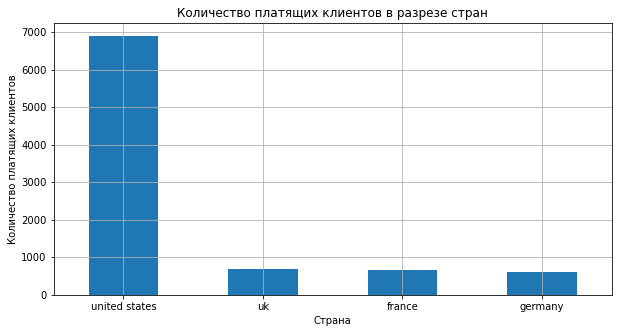

In [62]:
country_payer['payer'].plot( kind= 'bar', grid = True, figsize = (10,5))
plt.legend().remove()
plt.xlabel('Страна')
plt.ylabel('Количество платящих клиентов')
plt.title('Количество платящих клиентов в разрезе стран')
plt.xticks(rotation=0)
plt.show()

- Наибольшее количество платящих пользователей с "United States" - 6812 пользователя составляют 6.86% с всех пользователей "United States"

#### Какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. 

,user_id
device,
iphone,54479
android,35032
pc,30455
mac,30042


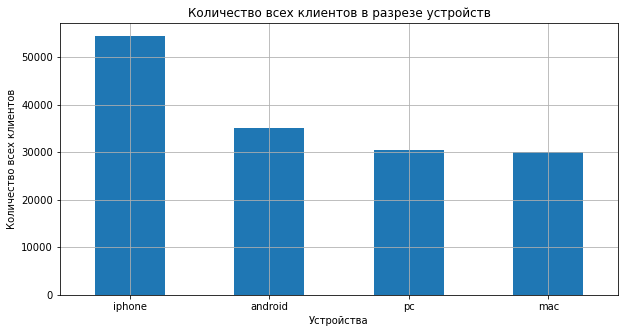

In [63]:
display(profiles.groupby(['device']).agg({'user_id':'nunique'}).sort_values(by='user_id', ascending= False))

(profiles.groupby(['device']).agg({'user_id':'nunique'}).sort_values(by='user_id', ascending= False)).plot( kind= 'bar', grid = True, figsize = (10,5))
plt.legend().remove()
plt.xlabel('Устройства')
plt.ylabel('Количество всех клиентов')
plt.title('Количество всех клиентов в разрезе устройств')
plt.xticks(rotation=0)
plt.show()

,user_id
device,
iphone,3382
android,2050
mac,1912
pc,1537


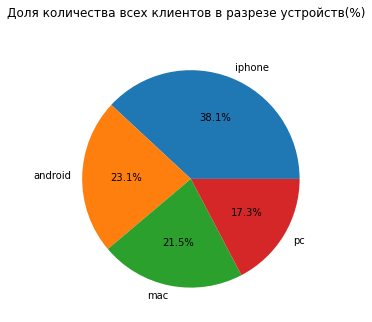

In [64]:
device_payer = profiles.query('payer == True').groupby(['device']).agg({'user_id':'nunique'}).sort_values(by='user_id', ascending= False)
display(device_payer)
device_payer.plot.pie(autopct='%1.1f%%', ylabel = '',title = "Доля количества всех клиентов в разрезе устройств(%)", subplots=True, legend = None, figsize=(5, 5));

- Пользователи пользуются таким устройствами как:
        - iPhone
        - Android
        - Mac
        - PC
- Платящие пользователи чаще пользуются iPhone, доля iPhone среди платящих клиентов составляет 38.1%


#### Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.


In [65]:
device_payer = (profiles.query('payer == True').groupby(['device']).agg({'user_id':'nunique'})).sort_values(by='user_id', ascending= False)

device_size = profiles.groupby('device').agg({'user_id':'nunique'}).sort_values(by='user_id', ascending= False)

device_payer = device_payer.merge(
        device_size['user_id'],
        on=['device'],
        how='left')

device_payer['payer_share'] = (device_payer['user_id_x'] * 100)/device_payer['user_id_y']
device_payer.columns = [['payer', 'size_all', 'payer_share %']]

device_payer

,payer,size_all,payer_share %
device,,,
iphone,3382,54479,6.21
android,2050,35032,5.85
mac,1912,30042,6.36
pc,1537,30455,5.05


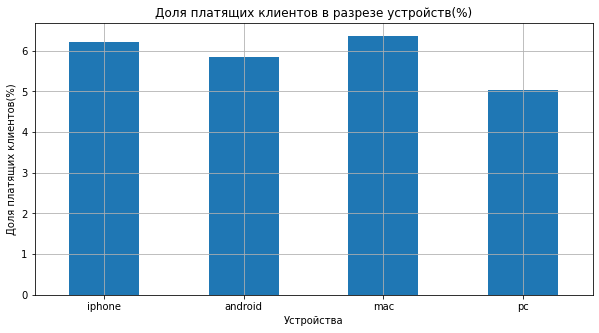

In [66]:
device_payer['payer_share %'].plot( kind= 'bar', grid = True, figsize = (10,5))
plt.legend().remove()
plt.xlabel('Устройства')
plt.ylabel('Доля платящих клиентов(%)')
plt.title('Доля платящих клиентов в разрезе устройств(%)')
plt.xticks(rotation=0)
plt.show()


- Наибольшая доля платящих клиентов, в разрезе устройств, используют `Mac`, далее идет `iPhone`
- Наибольшим по количеству клиентов - является `iPhone`


#### Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [67]:
channel_payer = (profiles.query('payer == True').groupby(['channel']).agg({'user_id':'nunique'})).sort_values(by='user_id', ascending= False)

channel_size = profiles.groupby('channel').agg({'user_id':'nunique'}).sort_values(by='user_id', ascending= False)

channel_payer = channel_payer.merge(
        channel_size['user_id'],
        on=['channel'],
        how='left')

channel_payer['payer_share'] = (channel_payer['user_id_x'] * 100)/channel_payer['user_id_y']
channel_payer.columns = [['payer', 'size_all', 'payer_share %']]

channel_payer

,payer,size_all,payer_share %
channel,,,
faceboom,3557,29144,12.20
tiptop,1878,19561,9.60
organic,1160,56439,2.06
wahoonetbanner,453,8553,5.30
adnonsense,440,3880,11.34
rocketsuperads,352,4448,7.91
leapbob,262,8553,3.06
opplecreativemedia,233,8605,2.71
lambdamediaads,225,2149,10.47


- Наибольшее количество платящих клиентов пришло с канала `faceboom`, также этот канал имеет наибольшую долю платящих клиентов, чем остальные каналы - 12.14%
- Наибольшее количество пользователей пришло с канала `organic`, но доля платящих клиентов из них составляет только 2% 

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Расчет общей суммы расходов на маркетинг

In [68]:
round(costs['costs'].sum(), 2)

105497.3

Всего было потрачено на маркетинг 105497.3

#### Распределение трат по рекламным источникам

['faceboom' 'organic' 'adnonsense' 'yrabbit' 'mediatornado'
 'rocketsuperads' 'leapbob' 'tiptop' 'wahoonetbanner' 'opplecreativemedia'
 'lambdamediaads']


,costs
channel,
tiptop,"54,751.30"
faceboom,"32,445.60"
wahoonetbanner,"5,151.00"
adnonsense,"3,911.25"
opplecreativemedia,"2,151.25"
rocketsuperads,"1,833.00"
leapbob,"1,797.60"
lambdamediaads,"1,557.60"
mediatornado,954.48


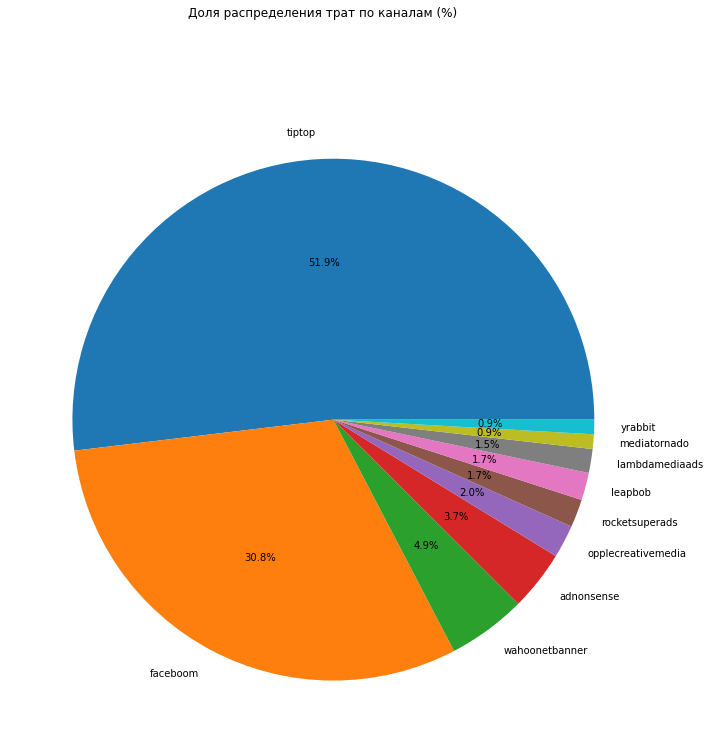

In [69]:
print(profiles['channel'].unique())
channel_cost = costs.groupby('channel').agg({'costs':'sum'}).sort_values(by = 'costs', ascending = False)
display(channel_cost)
channel_cost.plot.pie(autopct='%1.1f%%', ylabel = '', subplots=True,title= 'Доля распределения трат по каналам (%)', legend = None, figsize=(12,12));

- Наибольшее количество денег компания потратила на источник `tiptop`, который оказался только вторым по количеству привлечения платных клиентов после источника `faceboom`
- А также, чуть больше половины всех потраченных денег ушло на источник `tiptop`
- На источник `organic` не было потрачено денег

#### Построение визуализации динамики изменения расходов во времени по каждому источнику

Для начала, создадим столбцы недели и месяцев, для дальнейшей работы

In [70]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs['week'] = costs['dt'].dt.isocalendar().week
costs['month'] = costs['dt'].dt.month
costs.head()

,dt,channel,costs,week,month
0,2019-05-01,faceboom,113.30,18,5
1,2019-05-02,faceboom,78.10,18,5
2,2019-05-03,faceboom,85.80,18,5
3,2019-05-04,faceboom,136.40,18,5
4,2019-05-05,faceboom,122.10,18,5


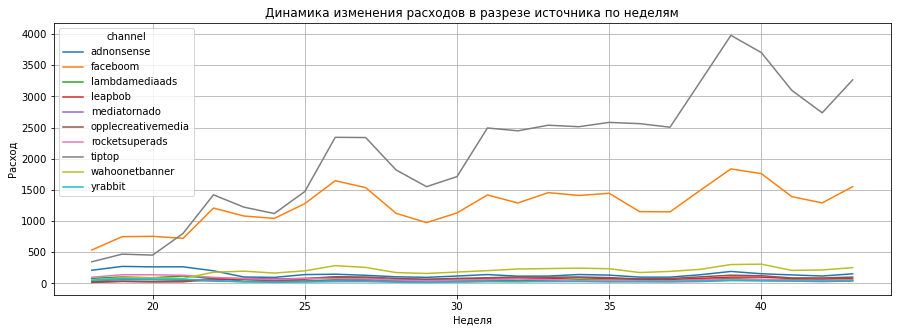

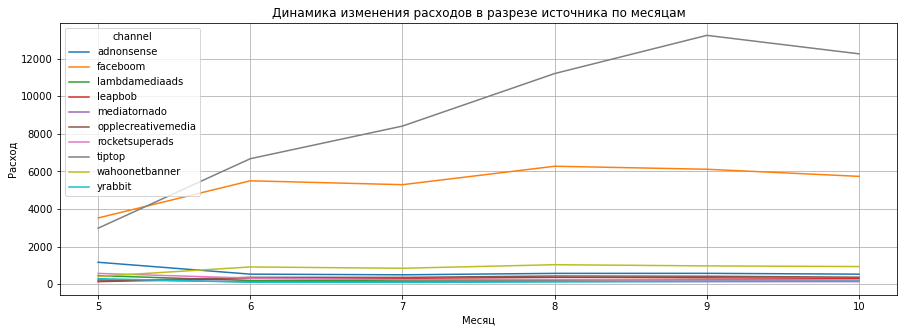

In [71]:
costs.pivot_table(
    index='week',  
    columns='channel',  
    values='costs', 
    aggfunc='sum'  
).plot(figsize=(15, 5), grid=True)
plt.title('Динамика изменения расходов в разрезе источника по неделям')
plt.ylabel('Расход')
plt.xlabel('Неделя')
plt.show()

costs.pivot_table(
    index='month', 
    columns='channel',  
    values='costs',  
    aggfunc='sum'  
).plot(figsize=(15, 5), grid=True)
plt.title('Динамика изменения расходов в разрезе источника по месяцам')
plt.ylabel('Расход')
plt.xlabel('Месяц')

plt.show()

На графиках видим, что графики источников `tiptop` и `faceboom` сильно выбиваются от остальных
- На них мы видим резкие скачки и падения трат на каналы `tiptop` и `faceboom`:
- на 21-й, 26-йб 31-й и 39-й неделе резко возрастают траты на эти источники
- в самом начале, заметно что на источник `faceboom` было потрачено больше чем на `tiptop`, но на 21-й неделе, наоборот, на `tiptop` стали тратить больше денег

#### Сколько в среднем стоило привлечение одного пользователся (CAC) из каждого источника

In [72]:
profiles.groupby('channel').agg({'acquisition_cost':'mean'}).sort_values(by='acquisition_cost', ascending = False)

,acquisition_cost
channel,
tiptop,2.80
faceboom,1.11
adnonsense,1.01
lambdamediaads,0.72
wahoonetbanner,0.60
rocketsuperads,0.41
opplecreativemedia,0.25
yrabbit,0.22
mediatornado,0.22


In [73]:
print('Средняя стоимость одного пользователя САС по проекту')
round(profiles['acquisition_cost'].mean(), 2)


Средняя стоимость одного пользователя САС по проекту


0.7

- Наибольшая средняя стоимость одного пользователя CAC приходится на источник `TipTop` - 2.79

В данном разделе был проведен анализ маркетинга - просмотрели распределение бюджета по источникам, построили динамику расхода по источникам, а также вычислили среднюю стоимость привлечения одного клиента. 

Получается что на рекламу было потрачено 105497.3, 51.9% из этого бюджета тратится только на один источник `tiptop`, динамика расхода данного источника сильно выбивается от остальных источников. При этом наибольшая часть платных пользователей приходят с другого источника `faceboom`. Соответственно, наибольшая средняя стоимость одного пользователя CAC приходится именно на данный источник `tiptop` - 2.79, когда как средняя стоимость одного пользователя всего проекта составляет 0.7, а CAC источника faceboom - 1.11 что в разы меньше `tiptop`. 

Нужно внимательней рассмотреть источник `tiptop`, возможно именно неоправданные большие затраты на данный источник влияют на общий доход проекта

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

Так как на источник `organic` не расходуется бюджет на рекламу, исключаем его из данных, во избежание искажения расчетов:

In [74]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14 
profiles = profiles.query('channel != "organic"')

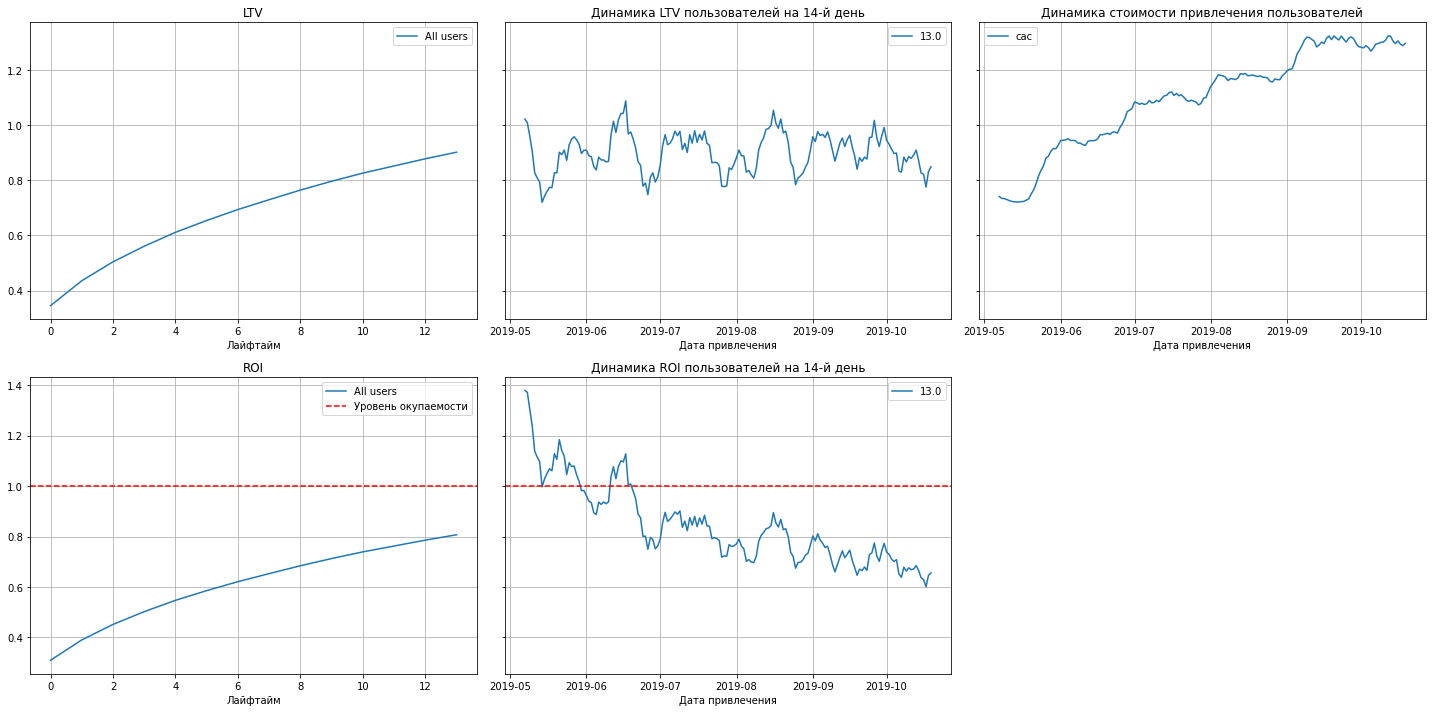

In [75]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

По графикам можно сделать такие выводы:
- Реклама совершенно не окупается. ROI в конце 2-й недели — чуть выше 80%.
- CAC увеличивается, значит увеличивается рекламный бюджет. Замечаем резкий скачок в июне 2019 года.
- LTV стабилен. Значит, дело не в ухудшении качества пользователей.
- С июня 2019-го года ROI перестает окупаться 

Чтобы разобраться в причинах, проходим по всем доступным характеристикам пользователей - стране, источнику и устройству первого посещения

#### Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.

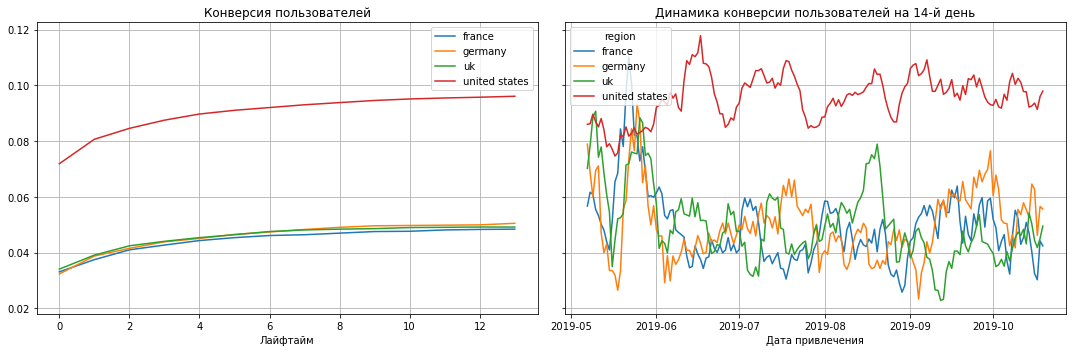

In [76]:
# смотрим конверсию с разбивкой по странам
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Судя по графикам, пользователи 'united states' конвертируются очень хорошо и постоянно. Рассмотрим удержание. Вызовем функции get_retention() и plot_retention(), чтобы рассчитать и отразить на графиках этот показатель.

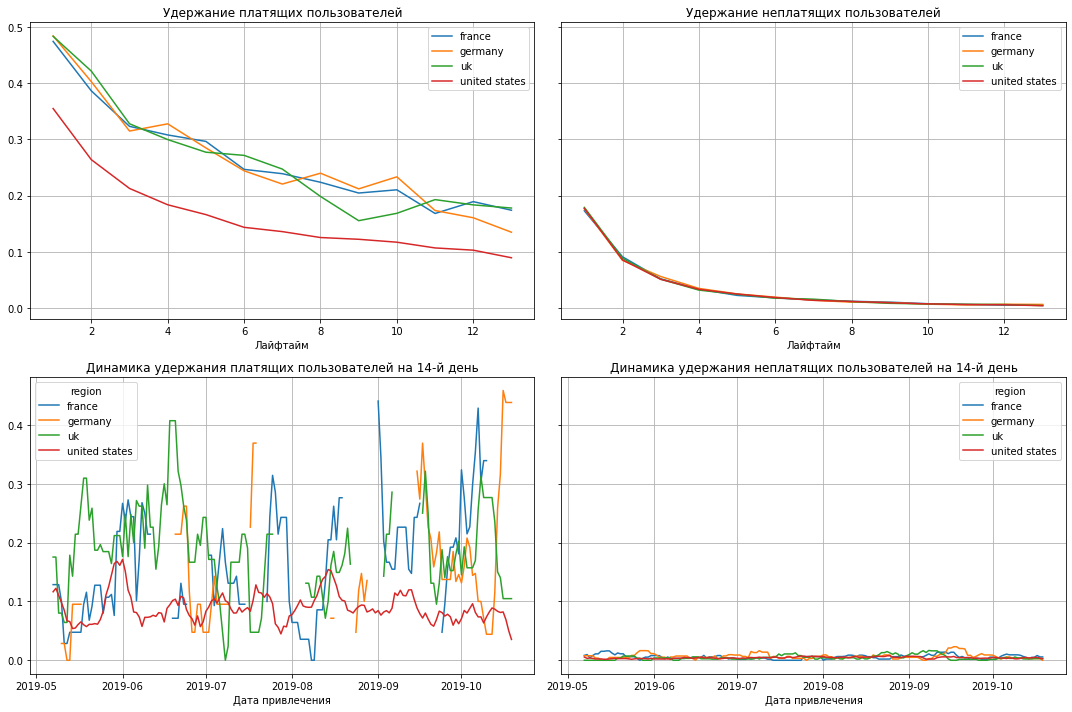

In [77]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Действительно, платящие пользователи 'united states' плохо удерживаются, удержание 14-го дня ниже, чем в остальных странах.  
Возможно, причина в какой-нибудь региональной проблеме при конверсии.

Далее рассмотрим конверсию и удержание с разбивкой по устройствам привлечения


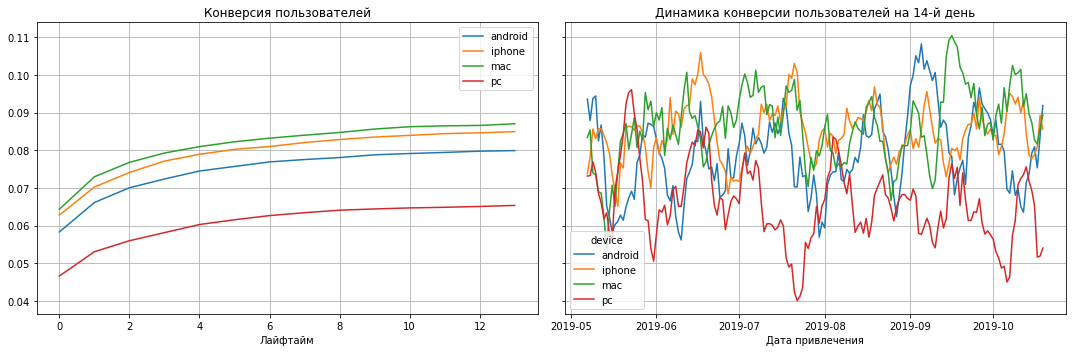

In [78]:
# смотрим конверсию с разбивкой по устройствам
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Пользователи PC конвертируются немного хуже, чем остальные устройства, а также как и было написано выше, в целом пользователи Apple имеют лучшую конверсию в покупателей. Возможно, тут есть плюсы ApplePay. 

Рассмотрим удержание 

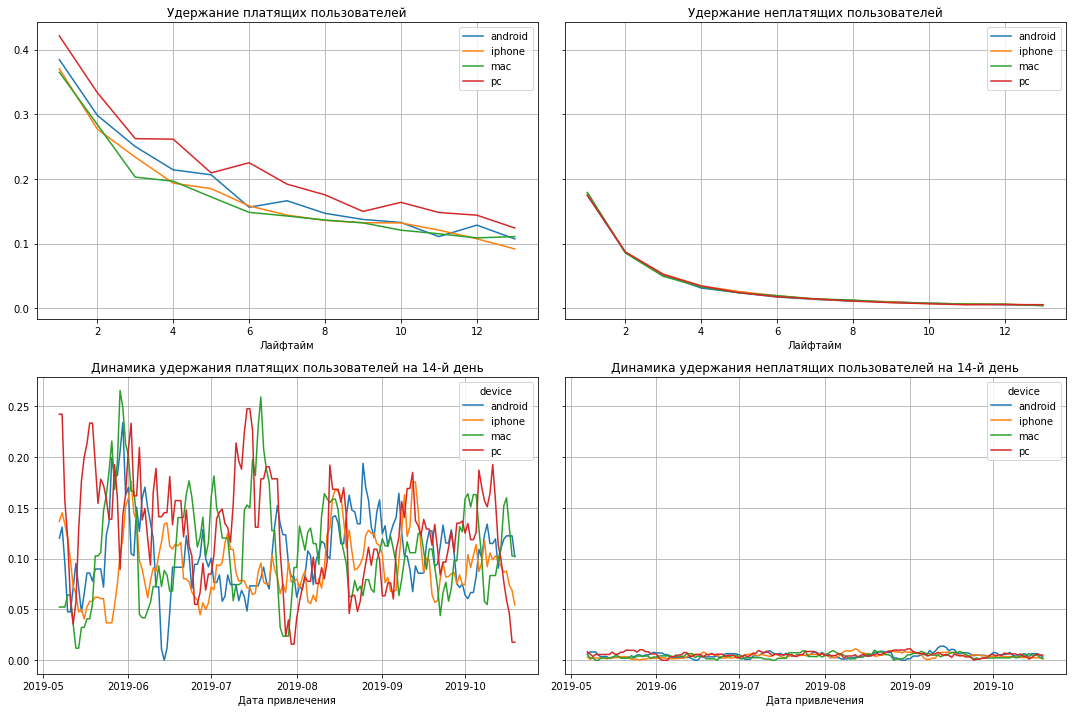

In [79]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание пользователей по устройствам примерно одинаковые, к тому же платящие пользователи устройства PC удерживаются немного лучше остальных устройств.

Посчитаем и визуализируем конверсию с разбивкой по каналам 

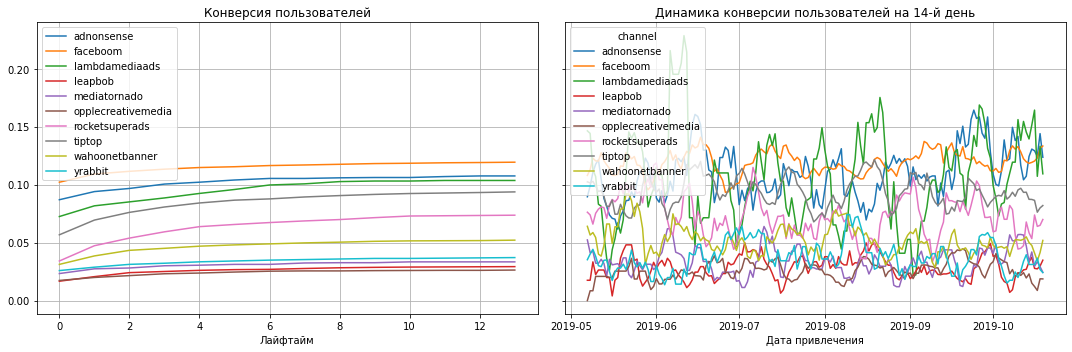

In [80]:
# смотрим конверсию с разбивкой по каналам
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

- Канал привлечения пользователей `faceboom` конвертируются лучше остальных каналов
- Конверсия всех каналов стабильная

Рассмотрим удержание

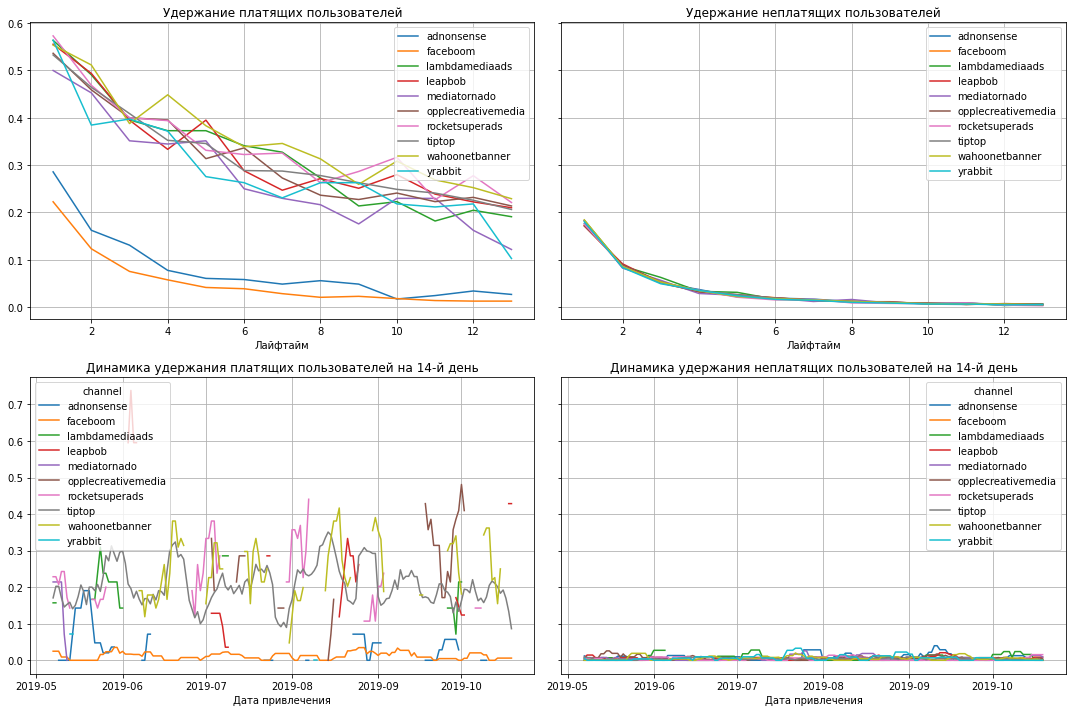

In [81]:
# смотрим удержание с разбивкой по каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

- Удержание платящих клиентов каналов `adnonsense` и `faceboom` самые низкие, то есть платящие пользователи данных каналов очень плохо удерживаются

#### Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.


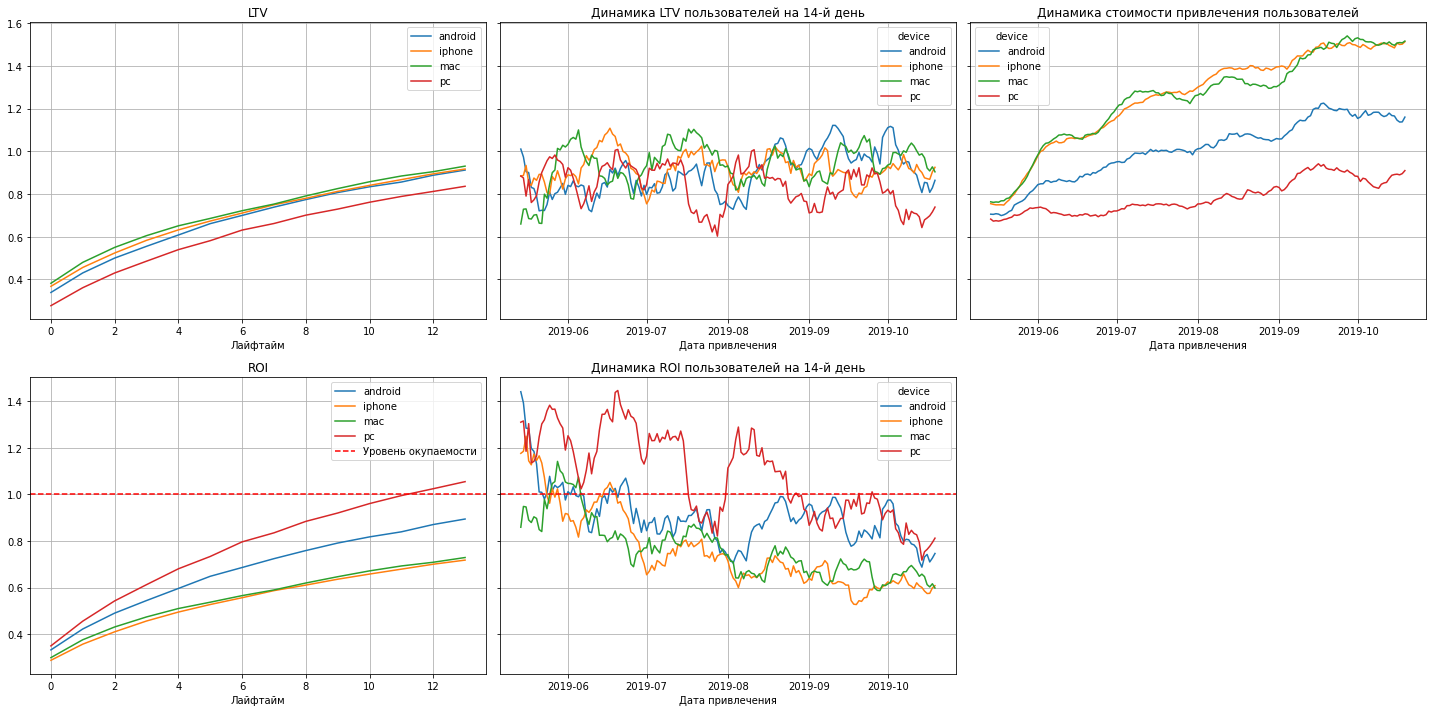

In [82]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Пользователи PC окупаются, а вот владельцы andriod, iPhone и Mac — нет.
Динамика ROI показывает, что перестают окупаться также с июня месяца 2019 года

Возможно, на это повлияло повышение бюджета на рекламу


#### Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

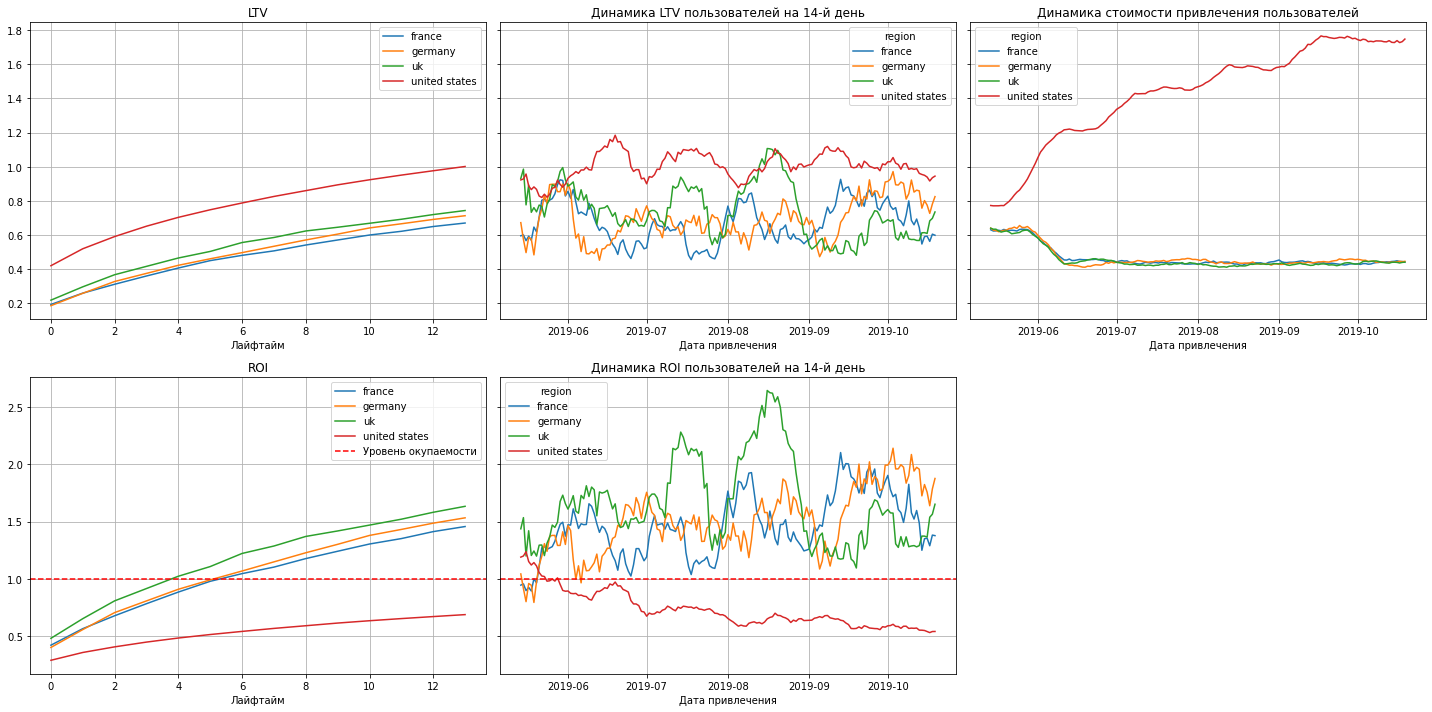

In [83]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Чтобы дальше разобраться в причинах, пройдём по всем доступным характеристикам пользователей — стране, источнику и устройству первого посещения.
Начнём с разбивки по странам: передадим параметру `dimensions` столбец `region`.

По данным таблиц выявляем:
- Реклама не окупается только в `united states`.
- Динамика стоимости привлечения поднимается только у `united states` и так же в июне 2019 года
- ROI `united states` сильно падает в то же время, когда повышается стоимость привлечения

Возможно, дело в рекламе страны — США, для уточнения проверим источники привлечения (channel). Возможно, на окупаемость влияет неудачная реклама в каких нибудь каналах.

In [84]:
profiles.query('region == "united states"')['channel'].unique()

array(['faceboom', 'yrabbit', 'mediatornado', 'rocketsuperads', 'tiptop'],
      dtype=object)

#### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

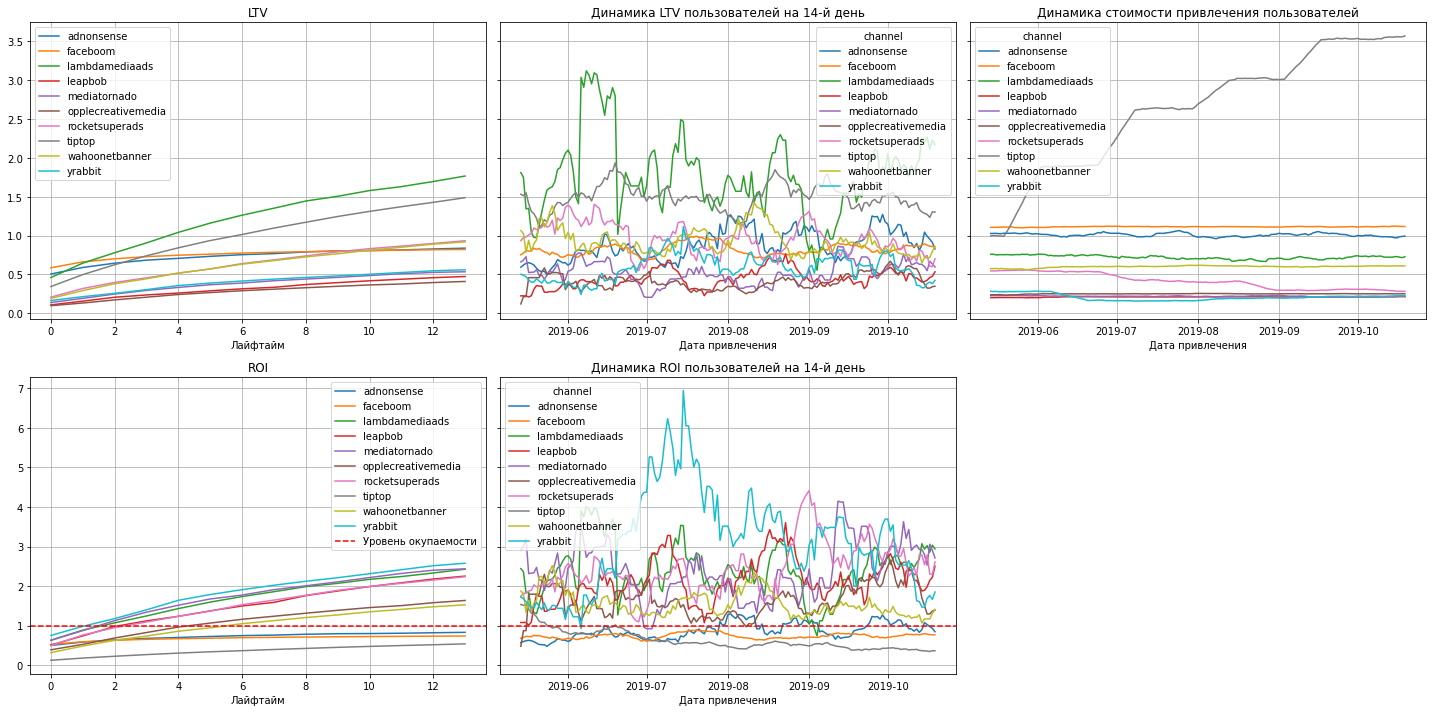

In [85]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

На графиках наглядно видно:
- Именно на канал привлечения клиентов 'tiptiop' в июне 2019 года было вложено резко большое количество денег
- Этот канал - `tiptiop`, а также `adnonsense` и `faceboom` не окупаются 

#### Ответьте на такие вопросы:


- Окупается ли реклама, направленная на привлечение пользователей в целом?
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости?

В целом реклама, направленная на привлечение пользователей, не окупается. По результатам графиков выше, на ее окупаемость в основном оказывают негативное влияние:

  - Низкая окупаемость в стране `United States`, пользователи данного региона высоко конвертируются но имеют очень низкий уровень удержания
  - Не окупаемость канала `tiptop`. Сильное увеличение стоимости привлечения пользователей канала `tiptop`, резко негативно сказывается на окупаемость
  - Не окупаемость рекламных каналов `adnonsense`, `faceboom`, к тому же эти каналы имеют самый низкий уровень удержания, где на `faceboom` вкладывается аж 30% от всего бюджета на рекламу.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

Выполнен анализ развлекательного приложения Procrastinate Pro+, для выявления причин убытков компании, для помощи выхода в плюс.

В ходе исследования был использован датасет  о пользователях, привлеченных с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

В результате исследования было выявлено, что основной причиной убытка компании является проблема окупаемости рекламных каналов. Всего компания использовала 11 каналов привлечения. Из которых `tiptiop`, `adnonsense` и `faceboom` не окупаются.

- У данных каналов привлечения самая высокая стоимость привлечения пользователей, среди остальных.
- На канал привлечения `tiptiop` в июне была резко увеличена стоимость привлечения пользователей CAC, из за чего негативно сказалось на его окупаемость 
- Не окупаемость рекламных каналов `adnonsense`, `faceboom`, к тому же эти каналы имеют самый низкий уровень удержания, где на `faceboom` вкладывается аж 30% от всего бюджета на рекламу.



Рекомендации по альтернативным регионам и каналам: 

Так как большая часть пользователей с США, а также именно у него самая высокая доля платящих пользователей, нужно сделать упор на продвижения успешных рекламных каналов. К примеру, `rocketsuperads` имеет наибольшее количество привлеченных клиентов, платящих пользователей и имеет высокую долю платящих 7.91 по отношению с двумя остальными окупаемыми каналами `yrabbit` и `mediatornado`. К тому же, у САС равен 0.41, что меньше общей средней САС 0.7. стабильное удержание, конверсия. 
Необходимо решить проблему с высокой САС канала `tiptiop` или же убрать ее из источников привлечения клиентов. Иначе компания так же продолжит терять деньги.
Либо избавиться от рекламных каналов `adnonsense`, `faceboom` либо решить проблему с их окупаемостью, поднять коэффициент удерживания платных клиентов

Советы по перспективным каналам по Европе:
По Европе работают такие каналы как: `adnonsense`,`leapbob`, `wahoonetbanner`, `opplecreativemedia`, `lambdamediaads`
Из которых, `lambdamediaads` имеет самый высокий уровень доли платных клиентов 10.47, имеет вполне себе среднюю САС 0.72, 


In [86]:
profiles.query('region !="united states"')['channel'].unique()

array(['adnonsense', 'leapbob', 'wahoonetbanner', 'opplecreativemedia',
       'lambdamediaads'], dtype=object)

- Реклама не окупается. 

Так как большая часть рекламного бюлжета идет на канал `tiptop`, который по показателям не приводит большое количество клиентов, соответственно и платящих клиентов. Слишком большая средняя стоимость одного пользователя на данный канал, который не окупается.
Данный канал негативно влиял на графики окупаемости в разбивке по странам и по устройствам 

- Остальные неокупаемые рекламные каналы `adnonsense`, `faceboom` имеют низкий показатель удерживания платных клиентов 

Рекомендации: 
- Скорректировать бюджет на рекламный канал привлечения пользователей `tiptop`, иначе компания также продолжит терять деньги
- Поднять коэффициент удерживания платных клиентов каналов `adnonsense`, `faceboom`